## Mahdi Anvari 610700002 Homework 2 of Machine Learning Question 4

In [35]:
# importing libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sbn
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense

• Load MNIST dataset (could be accessed using from keras.datasets in python)

In [6]:
mnist_path = 'c:/Users/M/Downloads/mnist.npz'
with np.load(mnist_path, allow_pickle=True) as f:
    X_train, Y_train = f['x_train'], f['y_train']
    X_test, Y_test = f['x_test'], f['y_test']
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [10]:
X_train = X_train.reshape(X_train.shape[0],-1)
X_test = X_test.reshape(X_test.shape[0],-1)
print(X_train.shape)
print(X_test.shape)

scaler = StandardScaler()
NormalizedXtrain = scaler.fit_transform(X_train)
NormalizedXtest = scaler.fit_transform(X_test)

(60000, 784)
(10000, 784)


a. Logistic Regression

In [23]:
LogReg = LogisticRegression(max_iter=1000)
LogReg.fit(X_train, Y_train)
Y_pred = LogReg.predict(X_test)
LogAccuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy for logistic regression:", LogAccuracy)

Accuracy for logistic regression: 0.9214


C:\Users\M\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


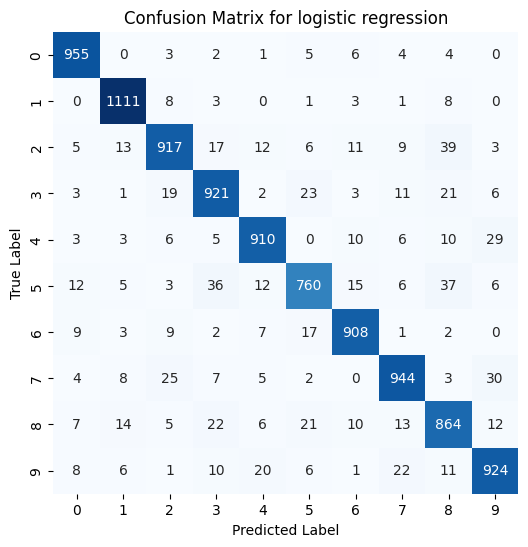

In [29]:
LogCM = confusion_matrix(Y_test, Y_pred)
plt.figure(figsize=(6, 6))
sbn.heatmap(LogCM, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for logistic regression')
plt.show()

b. MLP with one hidden layer of size 128

In [52]:
modelB = Sequential(name='modelB')
modelB.add(Dense(units=128, activation='relu', input_shape=(784,) ,name='hidden_layer'))
modelB.add(Dense(units=10, activation='softmax', name='output_layer'))
modelB.compile(optimizer=tf.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
modelB.summary()

Model: "modelB"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_layer (Dense)        (None, 128)               100480    
                                                                 
 output_layer (Dense)        (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [55]:
modelB.fit(X_train, Y_train, epochs=10, batch_size=32, validation_split=0.2)
loss, accuracy = modelB.evaluate(X_test, Y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

Epoch 1/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1760 - accuracy: 0.9571 - val_loss: 0.2726 - val_accuracy: 0.9454
Epoch 2/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1693 - accuracy: 0.9594 - val_loss: 0.3052 - val_accuracy: 0.9431
Epoch 3/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1688 - accuracy: 0.9591 - val_loss: 0.2883 - val_accuracy: 0.9471
Epoch 4/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1683 - accuracy: 0.9614 - val_loss: 0.2503 - val_accuracy: 0.9507
Epoch 5/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.1550 - accuracy: 0.9623 - val_loss: 0.2626 - val_accuracy: 0.9504
Epoch 6/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1514 - accuracy: 0.9624 - val_loss: 0.3094 - val_accuracy: 0.9448
Epoch 7/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1561 - accuracy: 0.9629 - val_loss: 0.3498 - val_accuracy:

313/313 [==============================] - 1s 2ms/step


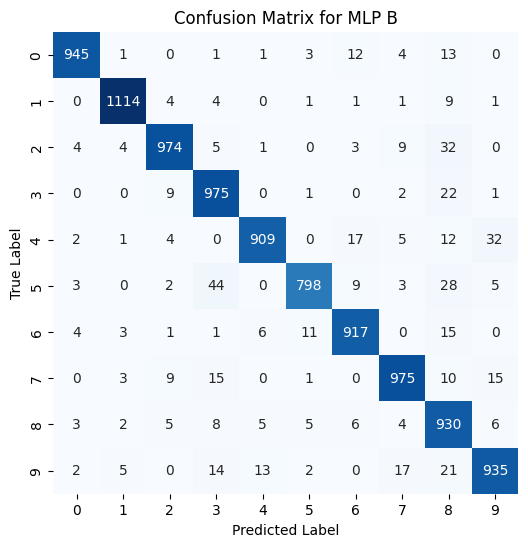

In [56]:
Y_pred = np.argmax(modelB.predict(X_test), axis=-1)
B_CM = confusion_matrix(Y_test, Y_pred)
plt.figure(figsize=(6, 6))
sbn.heatmap(B_CM, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for MLP B')
plt.show()

c. MLP with two hidden layers of sizes 256 and 128.

In [57]:
modelC = Sequential(name='modelC')
modelC.add(Dense(units=256, activation='relu', input_shape=(784,) ,name='hidden_layer1'))
modelC.add(Dense(units=128, activation='relu' ,name='hidden_layer2'))
modelC.add(Dense(units=10, activation='softmax', name='output_layer'))
modelC.compile(optimizer=tf.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
modelC.summary()

Model: "modelC"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_layer1 (Dense)       (None, 256)               200960    
                                                                 
 hidden_layer2 (Dense)       (None, 128)               32896     
                                                                 
 output_layer (Dense)        (None, 10)                1290      
                                                                 
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


In [58]:
modelC.fit(X_train, Y_train, epochs=10, batch_size=32, validation_split=0.2)
loss, accuracy = modelC.evaluate(X_test, Y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

Epoch 1/10
1500/1500 [==============================] - 8s 5ms/step - loss: 1.9098 - accuracy: 0.8776 - val_loss: 0.3792 - val_accuracy: 0.9073
Epoch 2/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2613 - accuracy: 0.9338 - val_loss: 0.2744 - val_accuracy: 0.9303
Epoch 3/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.1915 - accuracy: 0.9483 - val_loss: 0.2091 - val_accuracy: 0.9453
Epoch 4/10
1500/1500 [==============================] - 8s 6ms/step - loss: 0.1589 - accuracy: 0.9565 - val_loss: 0.1656 - val_accuracy: 0.9578
Epoch 5/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1468 - accuracy: 0.9595 - val_loss: 0.1998 - val_accuracy: 0.9540
Epoch 6/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.1249 - accuracy: 0.9657 - val_loss: 0.1580 - val_accuracy: 0.9590
Epoch 7/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.1206 - accuracy: 0.9674 - val_loss: 0.1565 - val_accuracy:

313/313 [==============================] - 1s 3ms/step


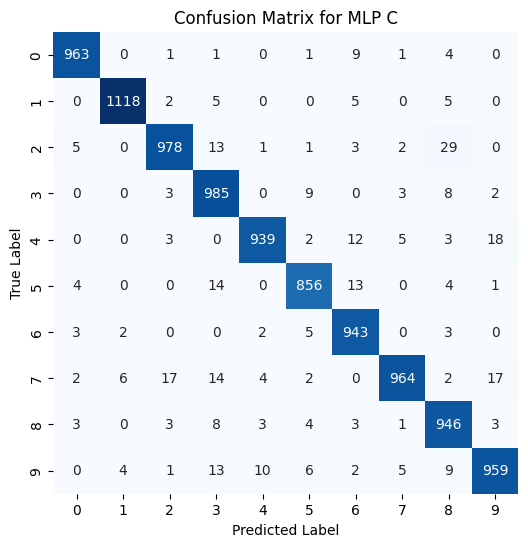

In [59]:
Y_pred = np.argmax(modelC.predict(X_test), axis=-1)
C_CM = confusion_matrix(Y_test, Y_pred)
plt.figure(figsize=(6, 6))
sbn.heatmap(C_CM, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for MLP C')
plt.show()